### Data:
* URL: http://odds.cs.stonybrook.edu/annthyroid-dataset/

In [1]:
import scipy.io
data = scipy.io.loadmat('annthyroid.mat')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
X = data['X']

In [4]:
df = pd.DataFrame(X)

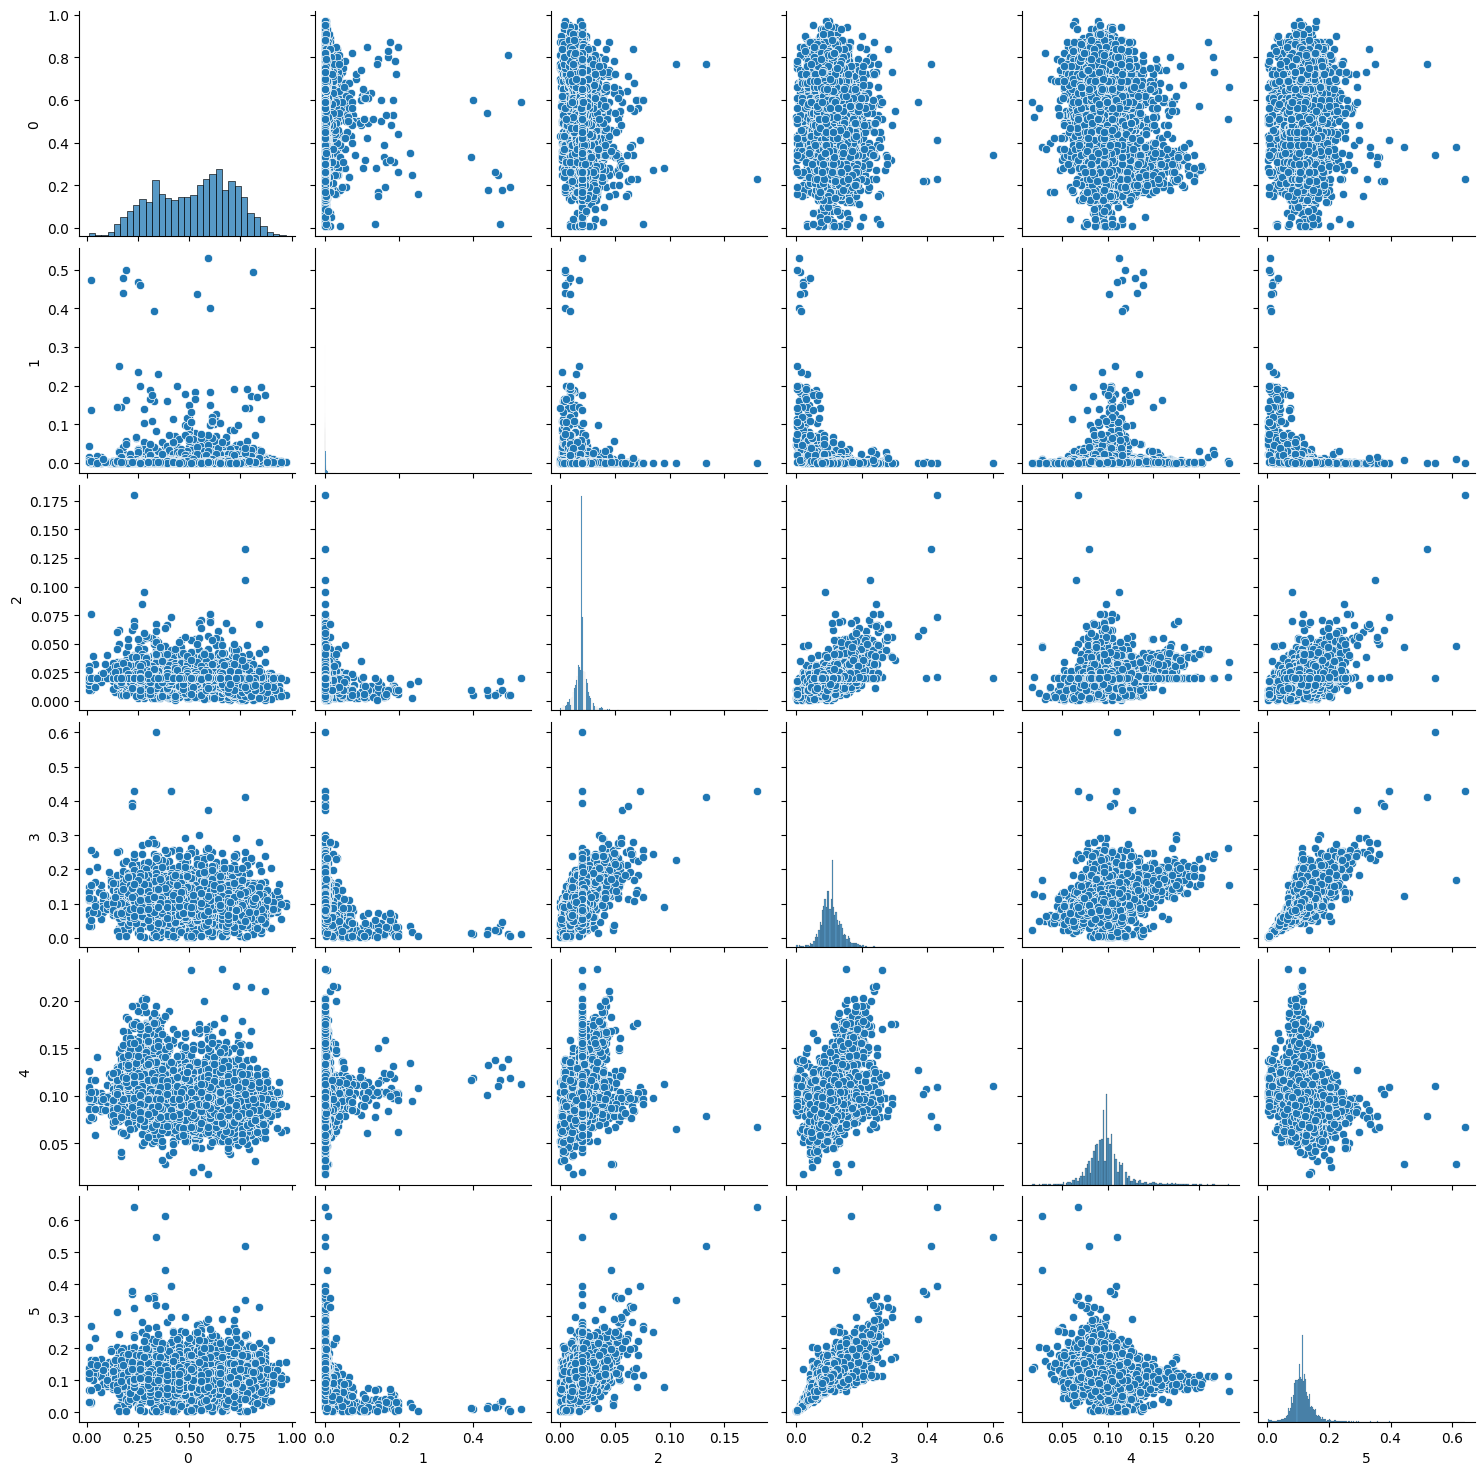

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

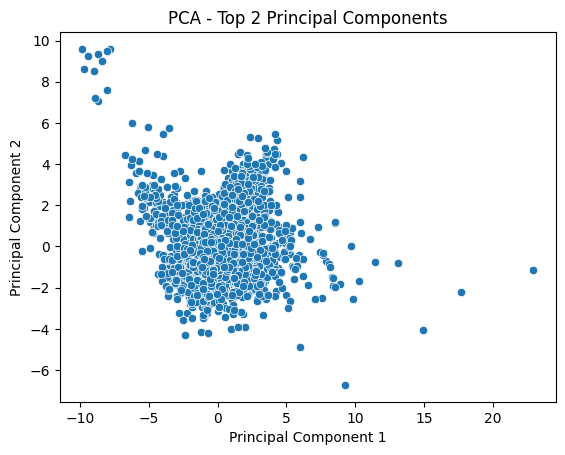

In [7]:
plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Top 2 Principal Components')
plt.show()

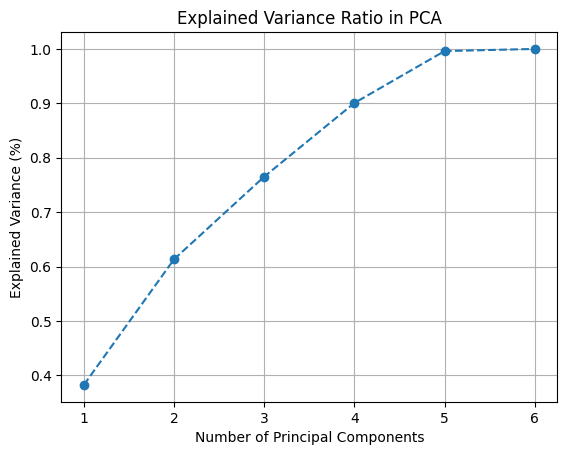

In [8]:
plt.figure()
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance Ratio in PCA')
plt.grid(True)
plt.show()

To identify a good threshold for reducing the dimensionality of the data, a common approach is to choose the number of principal components that explain a significant portion of the total variance (e.g., 80% or 90%). Thus, from this plot we can choose the number of principal components to be 4.  

In [9]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [10]:
kmeans = KMeans(n_clusters=7, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [11]:
dbscan = DBSCAN(eps=0.6, min_samples=8) 
dbscan_labels = dbscan.fit_predict(X_scaled)

In [12]:
agglo = AgglomerativeClustering(n_clusters=6) 
agglo_labels = agglo.fit_predict(X_scaled)

In [13]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)

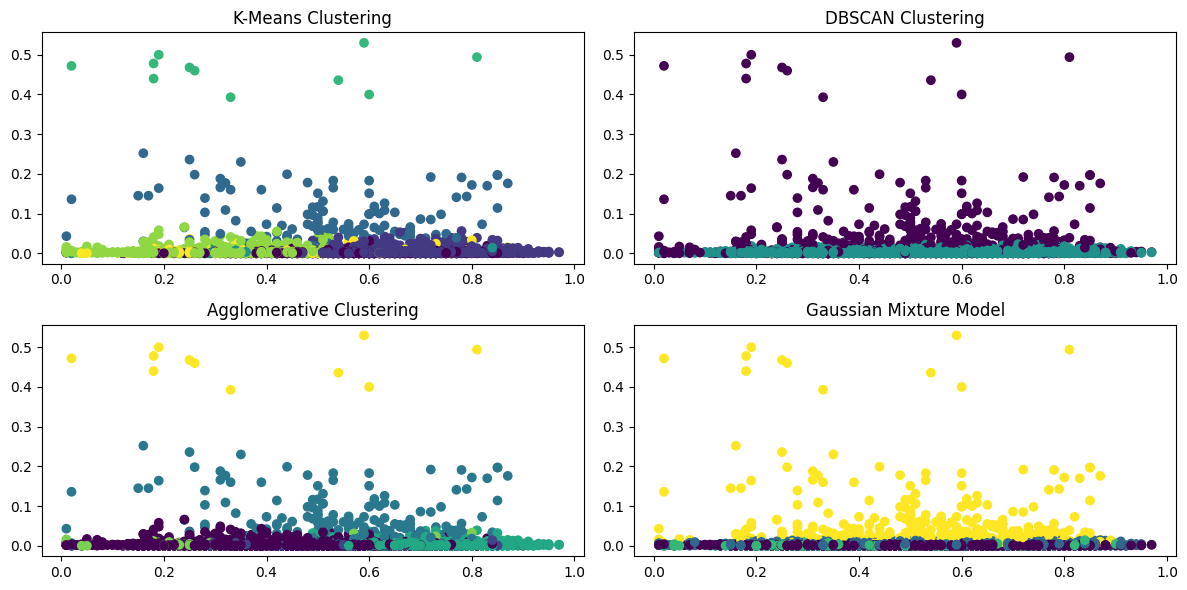

In [14]:
plt.figure(figsize=(12, 6))
# K-Means
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
# DBSCAN
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
# Agglomerative Clustering
plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=agglo_labels)
plt.title('Agglomerative Clustering')
# Gaussian Mixture Model
plt.subplot(224)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels)
plt.title('Gaussian Mixture Model')
plt.tight_layout()
plt.show()

The parameter tuning process for each algorithm that we followed is below:

K-Means:
Number of Clusters (n_clusters): We varyed the number of clusters to find the optimal value that reflects meaningful structures in the data.

DBSCAN:
Epsilon (eps): We adjusted the maximum distance between two samples to be considered in the same neighborhood. 
Minimum Samples (min_samples): we defined the minimum number of samples in a neighborhood for a point to be considered as a core point. 

Agglomerative Clustering:
Number of Clusters (n_clusters): We set the desired number of clusters based on our understanding of the data.

Gaussian Mixture Model:
Number of Components (n_components): We determined the number of clusters we expect in the data.

In [15]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

In [16]:
y_true = data['y']

In [17]:
nmi_kmeans = normalized_mutual_info_score(y_true.flatten(), kmeans_labels)
nmi_dbscan = normalized_mutual_info_score(y_true.flatten(), dbscan_labels)
nmi_agglo = normalized_mutual_info_score(y_true.flatten(), agglo_labels)
nmi_gmm = normalized_mutual_info_score(y_true.flatten(), gmm_labels)

In [18]:
ari_kmeans = adjusted_rand_score(y_true.flatten(), kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true.flatten(), dbscan_labels)
ari_agglo = adjusted_rand_score(y_true.flatten(), agglo_labels)
ari_gmm = adjusted_rand_score(y_true.flatten(), gmm_labels)

In [19]:
print("Normalized Mutual Information (NMI) scores:")
print(f"K-Means: {nmi_kmeans:.4f}")
print(f"DBSCAN: {nmi_dbscan:.4f}")
print(f"Agglomerative Clustering: {nmi_agglo:.4f}")
print(f"Gaussian Mixture Model: {nmi_gmm:.4f}\n")

print("Adjusted Rand Index (ARI) scores:")
print(f"K-Means: {ari_kmeans:.4f}")
print(f"DBSCAN: {ari_dbscan:.4f}")
print(f"Agglomerative Clustering: {ari_agglo:.4f}")
print(f"Gaussian Mixture Model: {ari_gmm:.4f}")

Normalized Mutual Information (NMI) scores:
K-Means: 0.0592
DBSCAN: 0.0655
Agglomerative Clustering: 0.0823
Gaussian Mixture Model: 0.1829

Adjusted Rand Index (ARI) scores:
K-Means: 0.0115
DBSCAN: 0.1805
Agglomerative Clustering: 0.0493
Gaussian Mixture Model: 0.1142


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, precision_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_true.ravel(), test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_auc = roc_auc_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_auc = roc_auc_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)

print("Random Forest Classifier:")
print("AUC:", rf_auc)
print("Precision:", rf_precision)
print("\nSupport Vector Machine (SVM) Classifier:")
print("AUC:", svm_auc)
print("Precision:", svm_precision)


Random Forest Classifier:
AUC: 0.9713555675094137
Precision: 0.84

Support Vector Machine (SVM) Classifier:
AUC: 0.7296261430876816
Precision: 0.82


The Random Forest Classifier achieved an AUC of 0.9714, indicating high discrimination power and the ability to differentiate between the positive and negative classes. The precision of 0.84 suggests that the classifier achieved a relatively high proportion of correct positive predictions compared to the total positive predictions made.

On the other hand, the SVM Classifier achieved a lower AUC of 0.7296, indicating lower discrimination power compared to the Random Forest Classifier. The precision of 0.82 indicates a slightly lower proportion of correct positive predictions compared to the Random Forest Classifier.

These results suggest that the Random Forest Classifier is better suited for this specific task, as it provides a higher overall performance in terms of both AUC and precision.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score

y_train = y_train.ravel()

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10],  
    'class_weight': ['balanced', None]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_rf_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_
best_rf_classifier.fit(X_train, y_train)
rf_predictions = best_rf_classifier.predict(X_test)
rf_auc = roc_auc_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
print("Best parameters:", best_params)
print("AUC:", rf_auc)
print("Precision:", rf_precision)


Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 200}
AUC: 0.9713555675094137
Precision: 0.84


The best parameters obtained for the Random Forest Classifier after tuning are:

class_weight: 'balanced'

max_depth: None

n_estimators: 200

The AUC (Area Under the Curve) score obtained with these parameters is 0.9714, indicating a high level of performance in distinguishing between the positive and negative classes. A higher AUC score suggests a better ability of the classifier to rank the positive instances higher than the negative instances.

The precision score obtained is 0.84, which represents the ratio of correctly predicted positive instances (true positives) to the total predicted positive instances (true positives + false positives). A precision score of 0.84 indicates that 84% of the instances predicted as positive are actually true positives.

Overall, the Random Forest Classifier with the tuned parameters performs well in terms of both AUC and precision.